In [100]:
import numpy as np
import matplotlib.pyplot as plt
import csv 

In [101]:
filepath='/Housing Price data set.csv'

# **Storing the value**

In [102]:
price=[]
area=[]
bedroom=[]
bathroom=[]
count=0
with open(filepath, mode ='r') as file:     
   csvFile = csv.reader(file) 
   for lines in csvFile:
     if count==0:
       count=count+1
       continue
     price.append(int(float(lines[1])))
     area.append(int(lines[2]))
     bedroom.append(int(lines[3]))
     bathroom.append(int(lines[4]))

In [103]:
m= round(0.7*len(price))
n=4
X1=np.array(area)
X2=np.array(bedroom)
X3=np.array(bathroom)
Y=np.array(price)

# **Training data and Testing data**

In [104]:
X_train1=X1[:m]
X_train2=X2[:m]
X_train3=X3[:m]
Y_train=Y[:m]

X_test1=X1[m+1:]
X_test2=X2[m+1:]
X_test3=X3[m+1:]
Y_test=Y[m+1:]

X_train0=np.ones(m,dtype=int)
X_test0=np.ones(len(X_test1),dtype=int)


In [105]:
X_train=[]
for i  in range(m):
  col=[]
  col.append(X_train0[i])
  col.append(X_train1[i])
  col.append(X_train2[i])
  col.append(X_train3[i])
  X_train.append(col)

X_bar=np.array(X_train)

# **Normal equations without regularization**

In [106]:
X_tran=X_bar.T
X_pro=X_tran.dot(X_bar)
W= np.linalg.inv(X_pro).dot(X_tran).dot(Y_train)

In [107]:
X_test=[]
for i  in range(len(X_test1)):
  col=[]
  col.append(X_test0[i])
  col.append(X_test1[i])
  col.append(X_test2[i])
  col.append(X_test3[i])
  X_test.append(col)

X_test=np.array(X_test)
# X_test

In [108]:
Y_predic=X_test.dot(W)   
Y_predic=Y_predic.astype(int)
# print(Y_predic)
# Y_test

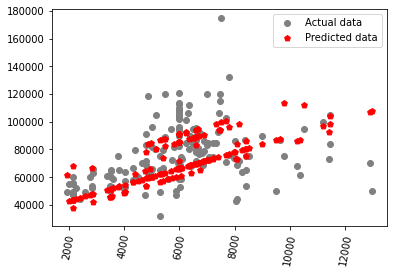

In [109]:
plt.xticks(rotation=80)
plt.scatter(X_test1, Y_test,  color='gray',label="Actual data",marker='o')
plt.legend()
plt.scatter(X_test1, Y_predic, color='red',label="Predicted data",marker='p')
plt.legend()

Accuracy of prediction

In [110]:
error_diff=np.subtract(Y_test,Y_predic)
abserror_diff=np.absolute(error_diff)
absolute_error=np.divide(abserror_diff,Y_test)
mean_ab_error=np.mean(absolute_error)

print("ACCURACY OF PREDICTION WITHOUT REGULARIZATION")
print(" ")
print(mean_ab_error*100)

ACCURACY OF PREDICTION WITHOUT REGULARIZATION
 
18.64542413597011


## **Normal equations with regularization**

In [111]:
I=np.identity(4,dtype=int)
I[0][0]=0

In [112]:
i=0
lambd=[]
error=[]
while i<3000:
  Wnew= np.linalg.inv(X_pro+i*I).dot(X_tran).dot(Y_train)
  Y_new=X_test.dot(Wnew)
  lambd.append(i)
  
  error_diff=np.subtract(Y_test,Y_new)
  abserror_diff=np.absolute(error_diff)
  absolute_error=np.divide(abserror_diff,Y_test)
  mean_ab_error=np.mean(absolute_error)

  error.append(mean_ab_error*100)
  i+=1

# error

Accuracy of prediction

In [113]:
minerror=np.amin(error)
print("ACCURACY OF PREDICTION WITH REGULARIZATION")
print(" ")
print(minerror)

ACCURACY OF PREDICTION WITH REGULARIZATION
 
18.55689437129676


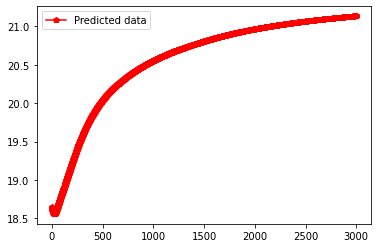

In [114]:
plt.plot(lambd,error, color='red',label="Predicted data",marker='p')
plt.legend()